In [9]:
# ML-Actividad-08


In [10]:
# Importar las librerías necesarias
from sklearn.datasets import load_iris
import pandas as pd


In [11]:
# Cargar el conjunto de datos iris
iris = load_iris()

# Crear un DataFrame con las características
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la columna de etiquetas (especies)
df_iris['target'] = iris.target
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar las primeras filas del DataFrame
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7dfab6099c60>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config


🔹 k = 2
Adjusted Rand Index: 0.5399
Confusion Matrix:
[[ 0 50  0]
 [47  3  0]
 [50  0  0]]

🔹 k = 3
Adjusted Rand Index: 0.7302
Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]

🔹 k = 4
Adjusted Rand Index: 0.6498
Confusion Matrix:
[[ 0 50  0  0]
 [23  0 27  0]
 [17  0  1 32]
 [ 0  0  0  0]]


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7dfab63a4680>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config


🔹 k = 5
Adjusted Rand Index: 0.6125
Confusion Matrix:
[[ 0 50  0  0  0]
 [ 0  0 26 24  0]
 [24  0  1 13 12]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]

📊 Comparación de ARI para distintos valores de k:
k = 2: ARI = 0.5399
k = 3: ARI = 0.7302
k = 4: ARI = 0.6498
k = 5: ARI = 0.6125


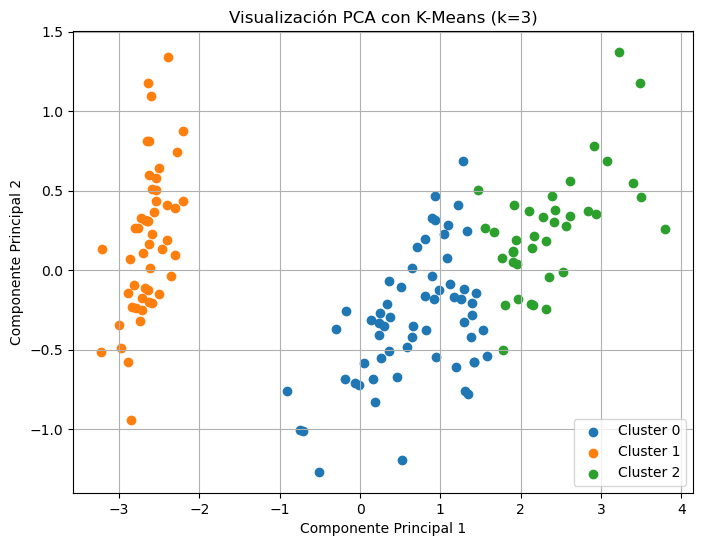

In [12]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Probar varios valores de k
ks = [2, 3, 4, 5]
results = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X)
    
    # Evaluar con índice Rand ajustado (0: aleatorio, 1: perfecto)
    ari = adjusted_rand_score(y_true, y_pred)
    results.append((k, ari))
    
    print(f"\n🔹 k = {k}")
    print(f"Adjusted Rand Index: {ari:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Mostrar resultados comparativos
print("\n📊 Comparación de ARI para distintos valores de k:")
for k, ari in results:
    print(f"k = {k}: ARI = {ari:.4f}")

# Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

best_k = 3
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_pred_best = kmeans_best.fit_predict(X)

plt.figure(figsize=(8, 6))
for i in range(best_k):
    plt.scatter(X_pca[y_pred_best == i, 0], X_pca[y_pred_best == i, 1], label=f'Cluster {i}')
plt.title(f'Visualización PCA con K-Means (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

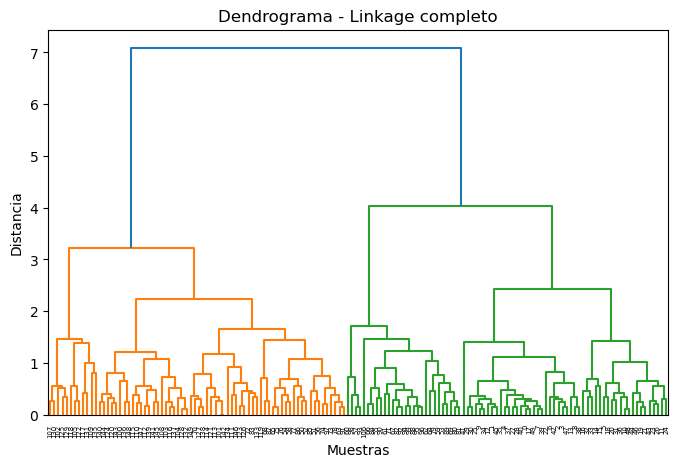


🔹 k = 2
Silhouette Score: 0.5160
Confusion Matrix:
[[50  0  0]
 [27 23  0]
 [ 1 49  0]]

🔹 k = 3
Silhouette Score: 0.5136
Confusion Matrix:
[[ 0 50  0]
 [23  0 27]
 [49  0  1]]

🔹 k = 4
Silhouette Score: 0.4998
Confusion Matrix:
[[50  0  0  0]
 [ 0 23 27  0]
 [ 0 37  1 12]
 [ 0  0  0  0]]

🔹 k = 5
Silhouette Score: 0.3462
Confusion Matrix:
[[ 0  0  0 21 29]
 [23  0 27  0  0]
 [37 12  1  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]

🔹 k = 6
Silhouette Score: 0.3382
Confusion Matrix:
[[ 0  0  0 21 29  0]
 [27  0 23  0  0  0]
 [ 1 12 15  0  0 22]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]

✅ Número óptimo de clústeres según silhouette: k = 2 (score = 0.5160)


In [13]:
# Pregunta 3.- Dendograma: Repite la pregunta anterior, pero en esta ocasión utiliza el agrupamiento jerárquico aglomerativo, 
# genera el dendrograma correspondiente utilizando el método de linkage completo y realiza el análisis de los índices silhouette 
# para seleccionar el número óptimo de clústeres

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Supongamos que ya tienes tus datos en X y las etiquetas verdaderas en y_true
# Correr todas las celdas para tener dichos datos
# X = ...
# y_true = ...
# o volver a cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y_true = iris.target

# 1. Generar el dendrograma con linkage completo
plt.figure(figsize=(8, 5))
Z = linkage(X, method='complete')  # linkage completo
dendrogram(Z)
plt.title("Dendrograma - Linkage completo")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()

# 2. Probar varios valores de k
ks = [2, 3, 4, 5, 6]
results = []

for k in ks:
    # Crear modelo aglomerativo
    model = AgglomerativeClustering(n_clusters=k, linkage="complete")
    y_pred = model.fit_predict(X)
    
    # Evaluar con matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Calcular índice silhouette
    sil = silhouette_score(X, y_pred)
    
    results.append((k, sil))
    
    print(f"\n🔹 k = {k}")
    print(f"Silhouette Score: {sil:.4f}")
    print("Confusion Matrix:")
    print(cm)

# 3. Seleccionar el número óptimo de clústeres según silhouette
best_k, best_sil = max(results, key=lambda x: x[1])
print(f"\n✅ Número óptimo de clústeres según silhouette: k = {best_k} (score = {best_sil:.4f})")


In [18]:
# Pregunta 4
# Con el número de clústeres obtenido en el punto 3, implementa el agrupamiento c-means difuso con el mismo conjunto de datos base. 
# Modifica algunos parámetros de inicialización (criterio de terminación/grado de difusividad) y repite el experimento anterior 
# al menos en 2 nuevas ocasiones.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, silhouette_score
import skfuzzy as fuzz

# 1. Cargar datos base (Iris)
iris = load_iris()
X = iris.data.T   # Transpuesta porque skfuzzy espera features como filas
y_true = iris.target

# 2. Definir número de clústeres
n_clusters = 2

# 3. Primera ejecución con parámetros estándar
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None
)

# Asignación final de clústeres (máxima pertenencia)
y_pred = np.argmax(u, axis=0)

print("\n🔹 Ejecución 1 (m=2.0, error=0.005)")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Silhouette Score:", silhouette_score(iris.data, y_pred))

# 4. Segunda ejecución modificando grado de difusividad (m)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=1.5, error=0.005, maxiter=1000, init=None
)
y_pred = np.argmax(u, axis=0)

print("\n🔹 Ejecución 2 (m=1.5, error=0.005)")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Silhouette Score:", silhouette_score(iris.data, y_pred))

# 5. Tercera ejecución modificando criterio de terminación (error)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=2.0, error=0.001, maxiter=1000, init=None
)
y_pred = np.argmax(u, axis=0)

print("\n🔹 Ejecución 3 (m=2.0, error=0.001)")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Silhouette Score:", silhouette_score(iris.data, y_pred))



🔹 Ejecución 1 (m=2.0, error=0.005)
Confusion Matrix:
[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]
Silhouette Score: 0.6810461692117462

🔹 Ejecución 2 (m=1.5, error=0.005)
Confusion Matrix:
[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]
Silhouette Score: 0.6810461692117462

🔹 Ejecución 3 (m=2.0, error=0.001)
Confusion Matrix:
[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]
Silhouette Score: 0.6810461692117462
